# Final Project 

### Student ID: 207276775

### GitHub project: 



In [1]:
# step 1 - install fickling
!pip3 install fickling

In [2]:
!pip3 install termcolor

In [3]:
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import numpy as np
import sys
import os, time
import platform
import datetime
import socket
import sys
import unittest
from unittest.mock import patch
import fickling.analysis as analysis
from fickling.pickle import Pickled
import builtins
import os
from IPython.display import Markdown
import pickle
import ast
import pickletools
from typing import Optional, TextIO, Tuple

import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


In [4]:
import ast
import json
import os
import re
import subprocess
import sys
from fickling.pickle import Pickled
import pickle
import _pickle as cPickle

from termcolor import colored
# -attacks
# https://www.cadosecurity.com/linux-attack-techniques-dynamic-linker-hijacking-with-ld-preload/
# https://www.cybertriage.com/blog/training/how-to-detect-running-malware-intro-to-incident-response-triage-part-7/

# https://www.beyondtrust.com/blog/entry/important-linux-files-protect
BAD_LIBRARY = {'/etc/hosts', '/bin/sh', '/etc/passwd', '/etc/pam.conf', '/proc', '/etc/shadow', '/etc/profile',
               '~/.bash_profile', '~/.bash_login', '~/.profile. /home/user/.bashrc', '/etc/bash.bashrc',
               '/etc/profile.d/', '/etc/system.d', '/etc/rc.*', '/etc/init.*.', '/etc/resolv.conf', '/etc/gshadow',
               '/etc/pam.d', '/bin', '/sbin'}
# This technique is often called DLL injection on Windows.
# With DLL injection, the attacker creates a malicious library with the same name and API as the good one.
# The program loads the malicious library and it, in turn, loads the good one and it will call the good one as needed to do the operations that the original program wants.
BAD_CALLS = {'os', 'shutil', 'sys', 'requests', 'net', 'func',
             'args',
             'keywords', }
BAD_SIGNAL = {'eval', 'compile', 'rm ', 'cat ', 'nc ', 'exec', 'open', 'run'}
BAD_FILES = {'.py', '.exe', '.dll', '.so'}
# https://redcanary.com/threat-detection-report/techniques/powershell/
# PowerShell -encodedcommand switch
# This detection analytic looks for the execution of powershell.exe with command lines that include variations of the -encodedcommand argument; PowerShell will recognize and accept anything from -e onward, and it will show up outside of the encoded bits.
BAD_COMMAND = {'powershell.exe', '-e', '-en', '-enc', '-enco', 'ls', 'base64'}
# Obfuscation and escape characters
# Obfuscation can disrupt detection logic by splitting commands or parameters or inserting extra characters (that are ignored by PowerShell).
# Monitor for the execution of PowerShell with unusually high counts of characters like ^, +, $, and %.
BAD_CHARACTER = {'^', '+', '$', '%'}
# Suspicious PowerShell cmdlets
# Many of our PowerShell detection analytics look for cmdlets, methods, and switches that may indicate malicious activity.
# The following analytic is by no means exhaustive but offers a few valuable examples of suspicious cmdlets and other oft-abused features to look out for:
BAD_CMD = {'-nop', '-noni', 'invoke-expression', 'iex', '.downloadstring', 'downloadfile'}
BAD_MODULE = {"__init__", "__new__", "__reduce__", "__builtin__", "os", "subprocess", "sys", "builtins", "socket"}
BAD_IMPORT = {'module', 'names', 'level', }

class scan_pickle_file:
    def __init__(self):
        pass
    def scann(scan):
        with open(scan, 'rb') as f:
                print()
                scan=(str(f.read()))
        print("\n******scanning-pickle******")
        result_output = ""
        result_total = 0
        result_other = 0
        result_calls = {}
        result_signals = {}
        result_files = {}
        result_library = {}
        result_cmd = {}
        result_moudle = {}
        result_import = {}

        for call in BAD_CALLS:
            result_calls[call] = 0
        for signal in BAD_SIGNAL:
            result_signals[signal] = 0
        for file in BAD_FILES:
            result_files[file] = 0
        for lib in BAD_LIBRARY:
            result_library[lib] = 0
        for cmd in BAD_CMD:
            result_cmd[cmd] = 0
        for moudle in BAD_MODULE:
            result_moudle[moudle] = 0
        for impor in BAD_IMPORT:
            result_import[impor] = 0

        input = scan
        for call in BAD_CALLS:
            if (input.find(call) > -1):
                result_calls[call] += 1
                result_total += 1
                result_output += "----- found lib call (" + call + ") -----\n"
                result_output += input

        for signal in BAD_SIGNAL:
            if (input.find(signal) > -1):
                result_signals[signal] += 1
                result_total += 1
                result_output += "----- found malicious signal (" + signal + ") -----\n"
                result_output += input

        for file in BAD_FILES:
            if (input.find(file) > -1):
                result_files[file] += 1
                result_total += 1
                result_output += "----- found malicious file (" + file + ") -----\n"
                result_output += input

        for lib in BAD_LIBRARY:
            if (input.find(lib) > -1):
                result_library[lib] += 1
                result_total += 1
                result_output += "----- found malicious signal (" + lib + ") -----\n"
                result_output += input

        for impo in BAD_IMPORT:
            if (input.find(impo) > -1):
                result_import[impo] += 1
                result_total += 1
                result_output += "----- found malicious import (" + impo + ") -----\n"
                result_output += input
        for cm in BAD_CMD:
            if (input.find(cm) > -1):
                result_cmd[impo] += 1
                result_total += 1
                result_output += "----- found malicious cmd command (" + cm + ") -----\n"
                result_output += input
        for mod in BAD_MODULE:
            if (input.find(mod) > -1):
                result_moudle[mod] += 1
                result_total += 1
                result_output += "----- found malicious module (" + mod + ") -----\n"
                result_output += input

        if result_total > 0:
            for file in BAD_FILES:
                if (result_files[file])>0:
                    print("malicious file (" + file + "): " + str(result_files[file]))
            for lib in BAD_LIBRARY:
                if (result_library[lib])>0:
                    print("malicious lib (" + lib + "): " + str(result_library[lib]))
            for call in BAD_CALLS:
                if (result_calls[call])>0:
                    print("library call (" + call + ".): " + str(result_calls[call]))
            for signal in BAD_SIGNAL:
                if (result_signals[signal])>0:
                    print("malicious signal (" + signal + "): " + str(result_signals[signal]))
            for c in BAD_CMD:
                if (result_cmd[c])>0:
                    print("malicious cmd command (" + c + "): " + str(result_cmd[c]))
            for m in BAD_MODULE:
                if (result_moudle[m])>0:
                    print("malicious module (" + m + "): " + str(result_moudle[m]))
            for i in BAD_IMPORT:
                if (result_import[i])>0:
                    print("malicious import (" + i + "): " + str(result_import[i]))
            if (result_other)>0:
                print("non-standard calls: " + str(result_other))
            # print("total: " + str(result_total))

            print(colored("SCAN FAILED\n", "red"))

            # print(result_output)
            # print(result_total)
        else:
            print(colored("SCAN PASSED!", "green"))

In [62]:
if sys.version_info < (3, 9):
    from astunparse import unparse
else:
    from ast import unparse

from fickling.pickle import Interpreter, Pickled
class cdr:
    def __init__(self):
        pass

    def code(self, pickled: Pickled) -> str:
        """
        Returns the string representation of the code object that was pickled.
        """
        code = pickled['code']
        return code.co_code.decode('utf-8')

    def check_safety(
        self, pickled: Pickled, filename, stdout: Optional[TextIO] = None, stderr: Optional[TextIO] = None
    ) -> bool:
        if stdout is None:
            stdout = sys.stdout
        if stderr is None:
            stderr = sys.stderr

        properties = pickled.properties
        likely_safe = True
        reported_shortened_code = set()

        def shorten_code(ast_node) -> Tuple[str, bool]:
            code = unparse(ast_node).strip()
            if len(code) > 32:
                cutoff = code.find("(")
                if code[cutoff] == "(":
                    shortened_code = f"{code[:code.find('(')].strip()}(...)"
                else:
                    shortened_code = code
            else:
                shortened_code = code
            was_already_reported = shortened_code in reported_shortened_code
            reported_shortened_code.add(shortened_code)
            return shortened_code, was_already_reported

        safe_lines = []

        with open(filename, 'rb') as f:
            code = str(f.read().decode('latin1'))

        for line in code.split('\n'):
            try:
                clean_string = line.replace('\x00', '')
                ast_node = compile(clean_string, '<string>', 'exec', ast.PyCF_ONLY_AST)
            except SyntaxError:
                continue
            is_safe = True
            for node in ast.walk(ast_node):
                if isinstance(node, ast.Call):
                    if (
                        isinstance(node.func, ast.Name)
                        and node.func.id == 'eval'
                    ):
                        is_safe = False
                    elif (
                        isinstance(node.func, ast.Attribute)
                        and node.func.attr == 'loads'
                        and isinstance(node.func.value, ast.Name)
                        and node.func.value.id == 'pickle'
                    ):
                        is_safe = False
                elif isinstance(node, ast.Import):
                    for alias in node.names:
                        if not alias.name.startswith('_') and alias.name not in sys.modules:
                            is_safe = False
                elif isinstance(node, ast.ImportFrom):
                    if not node.module.startswith('_') and node.module not in sys.modules:
                        is_safe = False
                elif ("eval" in line) or ("exec" in line) or ("compile" in line) or ("open" in line):
                    is_safe = False
                elif ("__builtin__"in line) or ("os" in line) or ("subprocess" in line) or ("sys" in line) or ("builtins" in line) or ("socket" in line):
                    is_safe = False

        with open(filename, 'rb') as f:
            data = f.read()

        for op in pickletools.genops(data):
            if type(op[1]) == str and all(substring not in op[1] for substring in ["eval", "exec", "compile", "open", "__builtin__", "os", "subprocess", "sys", "builtins", "socket"]):
                safe_lines.append(op[1])

        with open(filename, 'wb') as f:
            pickle.dump('\n'.join(safe_lines), f)

        if not safe_lines:
            return "False"

        if likely_safe:
            return "True"
        else:
            return "False"


In [63]:
import warnings
warnings.filterwarnings("ignore")
def setUpClass():
        class ExecuteCode(object):
            def __reduce__(self):
                return (builtins.exec, ("import os; os.system('echo I am executing arbitrary code!')",))
        class EvalCode(object):
            def __reduce__(self):
                return (eval, ("['a', 'b', 'c']",))
        class CompileCode(object):
            def __reduce__(self):
                return (compile, ("print('I execute code that runs on your computer')", "<string>", "exec"),)
        class OpenFile(object):
            def __reduce__(self):
                return (builtins.exec, ("f = open('/etc/passwd', 'r'); print(f.read()); f.close()",))
        class Os(object):
            def __reduce__(self):
                import os
                return (os.system, ("echo 'I execute code that runs on your computer'",))
        class MalSocket(object):
            def __reduce__(self):
                return socket.socket, (socket.AF_INET, socket.SOCK_STREAM)

        if os.path.exists(
                'malicious_socket.pkl'):
            os.remove(
                'malicious_socket.pkl')
        with open('malicious_socket.pkl', 'wb') as f:
            pickle.dump(MalSocket(), f)

        my_list = ['a', 'b', 'c']
        with open('malicious_exec.pkl', 'wb') as f:
            pickle.dump((ExecuteCode(), my_list), f)

        student_names = ['Alice','Bob','Elena','Jane','Kyle']
        with open('student_file.pkl', 'wb') as f:  # open a text file
            pickle.dump(student_names, f) # serialize the list

        with open('malicious_eval.pkl', 'wb') as f:
            pickle.dump(EvalCode(), f)

        with open(
                'malicious_compile.pkl', 'wb') as f:
            pickle.dump(CompileCode(), f)

        with open('malicious_open.pkl', 'wb') as f:
            pickle.dump(OpenFile(), f)

        # create a list to pickle
        fruits = ['apple', 'banana', 'orange']
        # open a file in write binary mode to pickle
        with open('fruits.pkl', 'wb') as f:
            # pickle the list
            pickle.dump(fruits, f)

        # create a dictionary to pickle
        person = {'name': 'John', 'age': 30, 'city': 'New York'}
        # open a file in write binary mode to pickle
        with open('person_dictionary.pkl', 'wb') as f:
            # pickle the dictionary
            pickle.dump(person, f)
        with open('malicious_os.pkl', 'wb') as f:
            pickle.dump(Os(), f)

        # Create a malicious pickle
        student_names = ['Alice','Bob','Elena','Jane','Kyle']
        pickle_bin = pickle.dumps(student_names)
        p = Pickled.load(pickle_bin)
        p.insert_python_exec("with open('/etc/passwd','r') as r: print(r.readlines())")
        p.insert_python_exec("with open('/etc/group','r') as r: print(r.readlines())")
        p.insert_python_exec("import module print('malicious')")
        p.insert_python_exec("import os  os.system('echo Malicious code!')")

        with open('unsafe.pkl', 'wb') as f:
            p.dump(f)

In [64]:
setUpClass()

# Data exploration

### Explore the data, understand the featues, statistics visualize the inputs

### What is Data Exploration?

Data exploration definition: Data exploration refers to the initial step in data analysis in which data analysts use data visualization and statistical techniques to describe dataset characterizations, such as size, quantity, and accuracy, in order to better understand the nature of the data.

https://www.heavy.ai/learn/data-exploration 

### Why Is Data Exploration Important? 

Exploration allows for deeper understanding of a dataset, making it easier to navigate and use the data later. The better an analyst knows the data they're working with, the better their analysis will be.

https://www.alteryx.com/glossary/data-exploration

## Details of a file

In [65]:
import pandas as pd

pickle_directory = r"C:\Users\RazEl"  # Use raw string format to avoid unicode error
files = Path(pickle_directory).glob('*.pkl')
# print(files)
cols =  ["file", "Last modified", "Created","mode", "ino", "dev", "nlink", "uid", "gid", "size", "atime", "mtime", "ctime"]
info = pd.DataFrame(columns=list(cols))

for file in files:
    curr=str(file).split("/")
    (mode, ino, dev, nlink, uid, gid, size, atime, mtime, ctime) = os.stat(file)
    new_rows=(curr[-1],time.ctime(os.path.getmtime(file)),time.ctime(os.path.getctime(file)),mode, ino, dev, nlink, uid, gid, size, atime, mtime, ctime)
    info.loc[len(info)] = new_rows

info

,file,Last modified,Created,mode,ino,dev,nlink,uid,gid,size,atime,mtime,ctime
0,C:\Users\RazEl\fruits.pkl,Wed Jun 7 11:12:31 2023,Mon Jun 5 12:46:06 2023,33206,562949953706567,2497774418,1,0,0,42,1686125551,1686125551,1685958366
1,C:\Users\RazEl\malicious_compile.pkl,Wed Jun 7 11:12:31 2023,Mon Jun 5 12:46:06 2023,33206,5348024557787717,2497774418,1,0,0,110,1686125551,1686125551,1685958366
2,C:\Users\RazEl\malicious_eval.pkl,Wed Jun 7 11:12:31 2023,Mon Jun 5 12:46:06 2023,33206,91197892454537796,2497774418,1,0,0,54,1686125551,1686125551,1685958366
3,C:\Users\RazEl\malicious_exec.pkl,Wed Jun 7 11:12:31 2023,Mon Jun 5 12:44:49 2023,33206,166914661189704237,2497774418,1,0,0,116,1686125551,1686125551,1685958289
4,C:\Users\RazEl\malicious_open.pkl,Wed Jun 7 11:12:31 2023,Mon Jun 5 12:46:06 2023,33206,3659174697523782,2497774418,1,0,0,95,1686125551,1686125551,1685958366
5,C:\Users\RazEl\malicious_os.pkl,Wed Jun 7 11:12:31 2023,Mon Jun 5 14:21:12 2023,33206,89227567617525371,2497774418,1,0,0,83,1686125551,1686125551,1685964072
6,C:\Users\RazEl\malicious_socket.pkl,Wed Jun 7 11:12:31 2023,Mon Jun 5 12:44:49 2023,33206,14918173765774095,2497774418,1,0,0,61,1686125551,1686125551,1685958289
7,C:\Users\RazEl\person_dictionary.pkl,Wed Jun 7 11:12:31 2023,Mon Jun 5 12:46:06 2023,33206,562949953706568,2497774418,1,0,0,56,1686125551,1686125551,1685958366
8,C:\Users\RazEl\student_file.pkl,Wed Jun 7 11:12:31 2023,Mon Jun 5 12:46:06 2023,33206,148337312726800963,2497774418,1,0,0,52,1686125551,1686125551,1685958366
9,C:\Users\RazEl\unsafe.pkl,Wed Jun 7 11:12:31 2023,Mon Jun 5 12:46:42 2023,33206,206321157929196098,2497774418,1,0,0,317,1686125551,1686125551,1685958402


## Files size

In [66]:
info [["file", "size"]]

,file,size
0,C:\Users\RazEl\fruits.pkl,42
1,C:\Users\RazEl\malicious_compile.pkl,110
2,C:\Users\RazEl\malicious_eval.pkl,54
3,C:\Users\RazEl\malicious_exec.pkl,116
4,C:\Users\RazEl\malicious_open.pkl,95
5,C:\Users\RazEl\malicious_os.pkl,83
6,C:\Users\RazEl\malicious_socket.pkl,61
7,C:\Users\RazEl\person_dictionary.pkl,56
8,C:\Users\RazEl\student_file.pkl,52
9,C:\Users\RazEl\unsafe.pkl,317


## Creation and update times of the files

In [67]:
info [["file", "Created", "Last modified"]]

,file,Created,Last modified
0,C:\Users\RazEl\fruits.pkl,Mon Jun 5 12:46:06 2023,Wed Jun 7 11:12:31 2023
1,C:\Users\RazEl\malicious_compile.pkl,Mon Jun 5 12:46:06 2023,Wed Jun 7 11:12:31 2023
2,C:\Users\RazEl\malicious_eval.pkl,Mon Jun 5 12:46:06 2023,Wed Jun 7 11:12:31 2023
3,C:\Users\RazEl\malicious_exec.pkl,Mon Jun 5 12:44:49 2023,Wed Jun 7 11:12:31 2023
4,C:\Users\RazEl\malicious_open.pkl,Mon Jun 5 12:46:06 2023,Wed Jun 7 11:12:31 2023
5,C:\Users\RazEl\malicious_os.pkl,Mon Jun 5 14:21:12 2023,Wed Jun 7 11:12:31 2023
6,C:\Users\RazEl\malicious_socket.pkl,Mon Jun 5 12:44:49 2023,Wed Jun 7 11:12:31 2023
7,C:\Users\RazEl\person_dictionary.pkl,Mon Jun 5 12:46:06 2023,Wed Jun 7 11:12:31 2023
8,C:\Users\RazEl\student_file.pkl,Mon Jun 5 12:46:06 2023,Wed Jun 7 11:12:31 2023
9,C:\Users\RazEl\unsafe.pkl,Mon Jun 5 12:46:42 2023,Wed Jun 7 11:12:31 2023


#### check min and max file size:

In [68]:
min=10000000
max=0
for file in files:
    (mode, ino, dev, nlink, uid, gid, size, atime, mtime, ctime) = os.stat(file)
    if size<min:
        min=size
    if size>max:
        max=size
        
        
print(min)
print(max)

10000000
0


# Video Metadata 

Metadata of a video file allows users to identify the characteristics of the file, making it easier to search, use and manage the video. The video metadata can, for instance, include the date the video was created, the creator's name, location, date of upload, and camera ID.

In [69]:
#!conda install ffmpeg

In [70]:
import sys
from pprint import pprint # for printing Python dictionaries in a human-readable way
from pathlib import Path

import json

In [71]:
info.shape

(11, 13)

In [83]:
import pickle
import pickletools

# Load the pickle file
with open('student_file.pkl', 'rb') as file:
    loaded_object = Pickled.load(file)

# Extract metadata using pickletools
pickle_data = pickle.dumps(loaded_object)
metadata = {
    'file_size': len(pickle_data),  # Size of the pickle file in bytes
    'protocol_version': pickle.format_version,  # Protocol version used for pickling
    'pickle_instructions': pickletools.dis(pickle_data),  # Disassembled pickle instructions

}

# Print the extracted metadata
for key, value in metadata.items():
    print(f'{key}: {value}')


    0: \x80 PROTO      4
    2: \x95 FRAME      633
   11: \x8c SHORT_BINUNICODE 'fickling.pickle'
   28: \x94 MEMOIZE    (as 0)
   29: \x8c SHORT_BINUNICODE 'Pickled'
   38: \x94 MEMOIZE    (as 1)
   39: \x93 STACK_GLOBAL
   40: \x94 MEMOIZE    (as 2)
   41: )    EMPTY_TUPLE
   42: \x81 NEWOBJ
   43: \x94 MEMOIZE    (as 3)
   44: }    EMPTY_DICT
   45: \x94 MEMOIZE    (as 4)
   46: (    MARK
   47: \x8c     SHORT_BINUNICODE '_opcodes'
   57: \x94     MEMOIZE    (as 5)
   58: ]        EMPTY_LIST
   59: \x94     MEMOIZE    (as 6)
   60: (        MARK
   61: h            BINGET     0
   63: \x8c         SHORT_BINUNICODE 'Proto'
   70: \x94         MEMOIZE    (as 7)
   71: \x93         STACK_GLOBAL
   72: \x94         MEMOIZE    (as 8)
   73: )            EMPTY_TUPLE
   74: \x81         NEWOBJ
   75: \x94         MEMOIZE    (as 9)
   76: }            EMPTY_DICT
   77: \x94         MEMOIZE    (as 10)
   78: (            MARK
   79: \x8c             SHORT_BINUNICODE 'arg'
   84: \x94       

Adding metadata to the dataframe

In [118]:
import pickle
import pickletools
pickle_directory = r"C:\Users\RazEl"  # Use raw string format to avoid unicode error
files = Path(pickle_directory).glob('*.pkl')
values_size = []
values_protocol = []
values_instructions = []

for file in files:
    values=[]
    # Load the pickle file
    with open(file, 'rb') as f:
        loaded_object = Pickled.load(f)

    # Extract metadata using pickletools
    pickle_data = pickle.dumps(loaded_object)
    metadata = {
        'file_size': len(pickle_data),  # Size of the pickle file in bytes
        'protocol_version': pickle.format_version,  # Protocol version used for pickling
        'pickle_instructions': str(pickletools.dis(pickle_data)),  # Disassembled pickle instructions as string
    }
    for key, value in metadata.items():
        values.append(value)
    values_size.append(values[0])
    values_protocol.append(values[1])
    values_instructions.append(values[2])

# Add the metadata values as new columns to the 'info' DataFrame
info['metadata_file_size'] = values_size
info['metadata_protocol_version'] = values_protocol
info['metadata_pickle_instructions'] = values_instructions

    0: \x80 PROTO      4
    2: \x95 FRAME      531
   11: \x8c SHORT_BINUNICODE 'fickling.pickle'
   28: \x94 MEMOIZE    (as 0)
   29: \x8c SHORT_BINUNICODE 'Pickled'
   38: \x94 MEMOIZE    (as 1)
   39: \x93 STACK_GLOBAL
   40: \x94 MEMOIZE    (as 2)
   41: )    EMPTY_TUPLE
   42: \x81 NEWOBJ
   43: \x94 MEMOIZE    (as 3)
   44: }    EMPTY_DICT
   45: \x94 MEMOIZE    (as 4)
   46: (    MARK
   47: \x8c     SHORT_BINUNICODE '_opcodes'
   57: \x94     MEMOIZE    (as 5)
   58: ]        EMPTY_LIST
   59: \x94     MEMOIZE    (as 6)
   60: (        MARK
   61: h            BINGET     0
   63: \x8c         SHORT_BINUNICODE 'Proto'
   70: \x94         MEMOIZE    (as 7)
   71: \x93         STACK_GLOBAL
   72: \x94         MEMOIZE    (as 8)
   73: )            EMPTY_TUPLE
   74: \x81         NEWOBJ
   75: \x94         MEMOIZE    (as 9)
   76: }            EMPTY_DICT
   77: \x94         MEMOIZE    (as 10)
   78: (            MARK
   79: \x8c             SHORT_BINUNICODE 'arg'
   84: \x94       

In [34]:
info

,file,Last modified,Created,mode,ino,dev,nlink,uid,gid,size,atime,mtime,ctime
0,C:\Users\RazEl\fruits.pkl,Wed Jun 7 10:29:23 2023,Mon Jun 5 12:46:06 2023,33206,562949953706567,2497774418,1,0,0,42,1686122963,1686122963,1685958366
1,C:\Users\RazEl\malicious_compile.pkl,Wed Jun 7 10:29:23 2023,Mon Jun 5 12:46:06 2023,33206,5348024557787717,2497774418,1,0,0,110,1686122963,1686122963,1685958366
2,C:\Users\RazEl\malicious_eval.pkl,Wed Jun 7 10:29:23 2023,Mon Jun 5 12:46:06 2023,33206,91197892454537796,2497774418,1,0,0,54,1686122963,1686122963,1685958366
3,C:\Users\RazEl\malicious_exec.pkl,Wed Jun 7 10:29:23 2023,Mon Jun 5 12:44:49 2023,33206,166914661189704237,2497774418,1,0,0,116,1686122963,1686122963,1685958289
4,C:\Users\RazEl\malicious_open.pkl,Wed Jun 7 10:29:23 2023,Mon Jun 5 12:46:06 2023,33206,3659174697523782,2497774418,1,0,0,95,1686122963,1686122963,1685958366
5,C:\Users\RazEl\malicious_os.pkl,Wed Jun 7 10:29:23 2023,Mon Jun 5 14:21:12 2023,33206,89227567617525371,2497774418,1,0,0,83,1686122963,1686122963,1685964072
6,C:\Users\RazEl\malicious_socket.pkl,Wed Jun 7 10:29:23 2023,Mon Jun 5 12:44:49 2023,33206,14636698789063439,2497774418,1,0,0,61,1686122963,1686122963,1685958289
7,C:\Users\RazEl\person_dictionary.pkl,Wed Jun 7 10:29:23 2023,Mon Jun 5 12:46:06 2023,33206,562949953706568,2497774418,1,0,0,56,1686122963,1686122963,1685958366
8,C:\Users\RazEl\safe_os.pkl,Mon Jun 5 14:37:41 2023,Mon Jun 5 12:46:06 2023,33206,562949953706569,2497774418,1,0,0,17,1685965361,1685965061,1685958366
9,C:\Users\RazEl\student_file.pkl,Wed Jun 7 10:29:23 2023,Mon Jun 5 12:46:06 2023,33206,148337312726800963,2497774418,1,0,0,52,1686122963,1686122963,1685958366


# Predication for models

In [164]:
def check_file(filename):
    display(Markdown("-------------------------- " + os.path.splitext(filename)[0] + " ----------------------------------"))
    with patch('sys.stdout') as stdout:
            with open(filename, 'rb') as f:
                pickled_data = f.read()
            pickled_obj = Pickled.load(pickled_data)
            # First run analysis.py
            analysis_result = analysis.check_safety(pickled_obj)
            print(analysis_result)
    if str(analysis_result) == '':
        print("clean")
        return 0

    else:
        print("not clean")
        return 1

In [166]:
import warnings
warnings.filterwarnings("ignore")  # Ignore warning messages

from csv import DictWriter
pickle_directory = r"C:\Users\RazEl"  # Use raw string format to avoid unicode error
files = Path(pickle_directory).glob('*.pkl')
lst=[]
for file in files:
# print(check_file(file))
    if check_file(file) == 1:
        lst.append('malware') 
    else:
        lst.append('benign')
info["mal"]=lst
# print(lst)


-------------------------- C:\Users\RazEl\fruits ----------------------------------

clean



Do not unpickle this file if it is from an untrusted source!


-------------------------- C:\Users\RazEl\malicious_compile ----------------------------------

not clean



Do not unpickle this file if it is from an untrusted source!


-------------------------- C:\Users\RazEl\malicious_eval ----------------------------------

not clean



Do not unpickle this file if it is from an untrusted source!


-------------------------- C:\Users\RazEl\malicious_exec ----------------------------------

not clean



Do not unpickle this file if it is from an untrusted source!


-------------------------- C:\Users\RazEl\malicious_open ----------------------------------

not clean



Do not unpickle this file if it is from an untrusted source!


-------------------------- C:\Users\RazEl\malicious_os ----------------------------------

not clean



Do not unpickle this file if it is from an untrusted source!


-------------------------- C:\Users\RazEl\malicious_socket ----------------------------------

not clean



Do not unpickle this file if it is from an untrusted source!


-------------------------- C:\Users\RazEl\person_dictionary ----------------------------------

clean



Do not unpickle this file if it is from an untrusted source!


-------------------------- C:\Users\RazEl\student_file ----------------------------------

clean



Do not unpickle this file if it is from an untrusted source!


-------------------------- C:\Users\RazEl\unsafe ----------------------------------

not clean



Do not unpickle this file if it is from an untrusted source!


-------------------------- C:\Users\RazEl\unsafe_os ----------------------------------

clean



Do not unpickle this file if it is from an untrusted source!


In [167]:
info

,file,Last modified,Created,mode,ino,dev,nlink,uid,gid,size,atime,mtime,ctime,metadata_file_size,metadata_protocol_version,metadata_pickle_instructions,mal
0,C:\Users\RazEl\fruits.pkl,Wed Jun 7 11:12:31 2023,Mon Jun 5 12:46:06 2023,33206,562949953706567,2497774418,1,0,0,42,1686125551,1686125551,1685958366,542,4.0,None,benign
1,C:\Users\RazEl\malicious_compile.pkl,Wed Jun 7 11:12:31 2023,Mon Jun 5 12:46:06 2023,33206,5348024557787717,2497774418,1,0,0,110,1686125551,1686125551,1685958366,807,4.0,None,malware
2,C:\Users\RazEl\malicious_eval.pkl,Wed Jun 7 11:12:31 2023,Mon Jun 5 12:46:06 2023,33206,91197892454537796,2497774418,1,0,0,54,1686125551,1686125551,1685958366,611,4.0,None,malware
3,C:\Users\RazEl\malicious_exec.pkl,Wed Jun 7 11:12:31 2023,Mon Jun 5 12:44:49 2023,33206,166914661189704237,2497774418,1,0,0,116,1686125551,1686125551,1685958289,1028,4.0,None,malware
4,C:\Users\RazEl\malicious_open.pkl,Wed Jun 7 11:12:31 2023,Mon Jun 5 12:46:06 2023,33206,3659174697523782,2497774418,1,0,0,95,1686125551,1686125551,1685958366,693,4.0,None,malware
5,C:\Users\RazEl\malicious_os.pkl,Wed Jun 7 11:12:31 2023,Mon Jun 5 14:21:12 2023,33206,89227567617525371,2497774418,1,0,0,83,1686125551,1686125551,1685964072,669,4.0,None,malware
6,C:\Users\RazEl\malicious_socket.pkl,Wed Jun 7 11:12:31 2023,Mon Jun 5 12:44:49 2023,33206,14918173765774095,2497774418,1,0,0,61,1686125551,1686125551,1685958289,775,4.0,None,malware
7,C:\Users\RazEl\person_dictionary.pkl,Wed Jun 7 11:12:31 2023,Mon Jun 5 12:46:06 2023,33206,562949953706568,2497774418,1,0,0,56,1686125551,1686125551,1685958366,686,4.0,None,benign
8,C:\Users\RazEl\student_file.pkl,Wed Jun 7 11:12:31 2023,Mon Jun 5 12:46:06 2023,33206,148337312726800963,2497774418,1,0,0,52,1686125551,1686125551,1685958366,644,4.0,None,benign
9,C:\Users\RazEl\unsafe.pkl,Wed Jun 7 11:12:31 2023,Mon Jun 5 12:46:42 2023,33206,206321157929196098,2497774418,1,0,0,317,1686125551,1686125551,1685958402,1631,4.0,None,malware


In [123]:
def process_file(filename):
    display(Markdown("-------------------------- " + os.path.splitext(filename)[0] + " ----------------------------------"))
    
    with patch('sys.stdout') as stdout:
            
        with open(filename, 'rb') as f:
                pickled_data = f.read()
        pickled_obj = Pickled.load(pickled_data)
            # First run analysis.py
        analysis_result = analysis.check_safety(pickled_obj)
#         display(str(analysis_result)) # Expecting clean
        if str(analysis_result) == '':
            display(Markdown("clean"))
        else:
            display(Markdown("not clean"))
            scan_pickle_file.scann(filename)
            display(Markdown("Now removing the malicious data...."))
            with patch('sys.stdout') as stdout:
                cdr().check_safety(pickled_obj,filename)
                
                # Finally, run analysis.py again
                with open(filename, 'rb') as f:
                    pickled_data = f.read()
                pickled_obj = Pickled.load(pickled_data)
                analysis_result_2 = analysis.check_safety(pickled_obj)
                display(str(analysis_result_2)) # Expecting clean
            # Check stdout for expected messages
            if str(analysis_result_2) == '':
                display(Markdown("clean"))
                display(Markdown("\nThe clean data left in the file:"))
                with open(filename, 'rb') as f:
                    pickled_data = pickle.load(f)
                display(str(pickled_data))
            else:
                display(Markdown("not clean"))



#### Consolidate all columns of information for the datasets

In [168]:
print(info["mal"])

0      benign
1     malware
2     malware
3     malware
4     malware
5     malware
6     malware
7      benign
8      benign
9     malware
10     benign
Name: mal, dtype: object


In [169]:
info.shape

(11, 17)

skew:
    
    In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.


In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

Skewness: 2.523202
Kurtosis: 7.292910


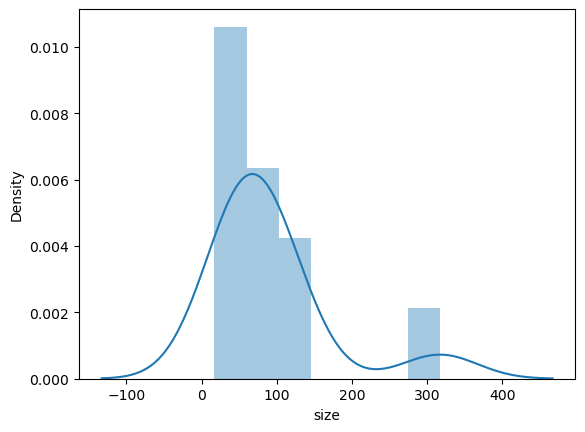

In [173]:
sns.distplot(info['size'])
print("Skewness: %f" % info['size'].skew())
print("Kurtosis: %f" % info['size'].kurt())

Skewness: 1.735949
Kurtosis: 4.495578


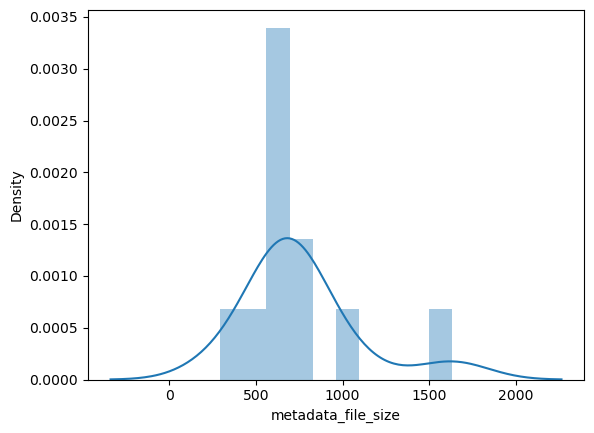

In [174]:
sns.distplot(info['metadata_file_size'])
print("Skewness: %f" % info['metadata_file_size'].skew())
print("Kurtosis: %f" % info['metadata_file_size'].kurt())

## Memory Heat Map (MHM)
According to the article:
http://www.cs.yale.edu/homes/yoon-man-ki/DAC2015_MemoryHeatMap.pdf ,
The efficiency can be seen in the Memory Heat Map (MHM) to characterize the memory behavior of the operating system and to identify an anomaly in a real-time system.

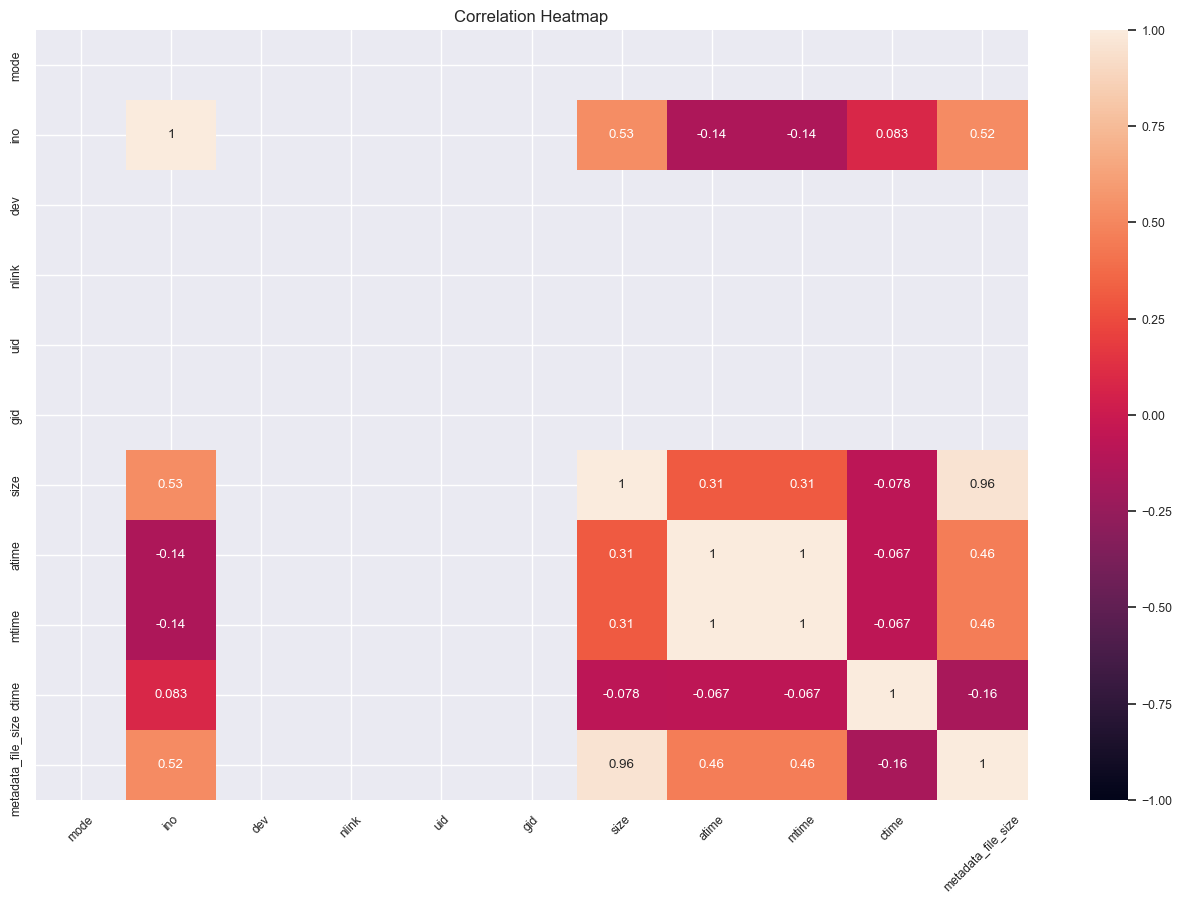

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns

# Increase the size of the heatmap and adjust font size
plt.figure(figsize=(16, 10))
sns.set(font_scale=0.8)

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(info.corr(), vmin=-1, vmax=1, annot=True)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 12})

# Display the plot
plt.show()


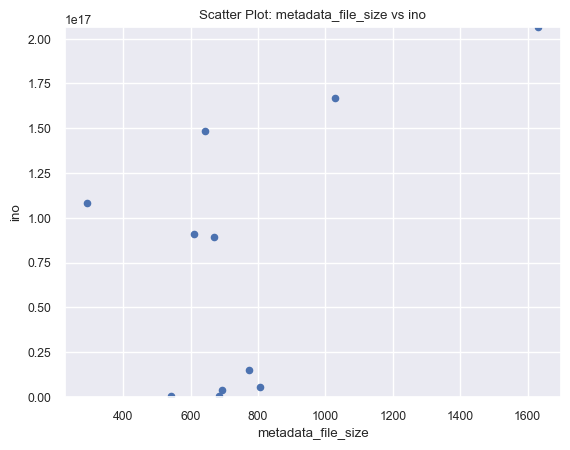

In [199]:
# Convert 'ino' column to numeric values
info['ino'] = pd.to_numeric(info['ino'], errors='coerce')

# Scatter plot 'metadata_file_size' vs 'ino'
var = 'metadata_file_size'
data = pd.concat([info['ino'], info[var]], axis=1)
data.plot.scatter(x=var, y='ino')

# Set appropriate limits for the y-axis
plt.ylim(0, info['ino'].max())  # Adjust the upper limit based on your data

# Add labels and title
plt.xlabel(var)
plt.ylabel('ino')
plt.title('Scatter Plot: metadata_file_size vs ino')

# Show the plot
plt.show()


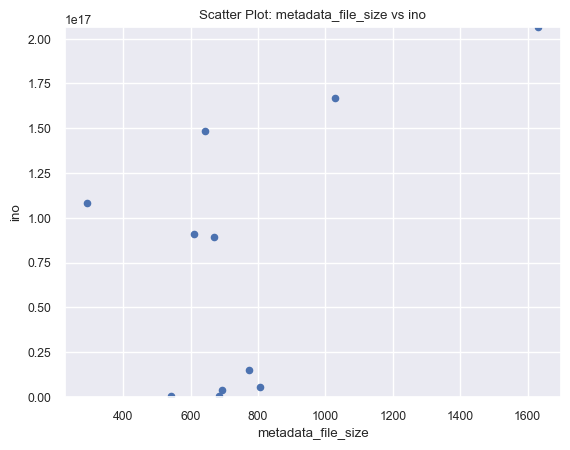

In [200]:
# Convert 'ino' column to numeric values
info['ino'] = pd.to_numeric(info['ino'], errors='coerce')

# Scatter plot 'metadata_file_size' vs 'ino'
var = 'metadata_file_size'
data = pd.concat([info['ino'], info[var]], axis=1)
data.plot.scatter(x=var, y='ino')

# Set appropriate limits for the y-axis
plt.ylim(0, info['ino'].max())  # Adjust the upper limit based on your data

# Add labels and title
plt.xlabel(var)
plt.ylabel('ino')
plt.title('Scatter Plot: metadata_file_size vs ino')

# Show the plot
plt.show()


# Data organization

our columns:


In [201]:
info.columns

Index(['file', 'Last modified', 'Created', 'mode', 'ino', 'dev', 'nlink',
       'uid', 'gid', 'size', 'atime', 'mtime', 'ctime', 'metadata_file_size',
       'metadata_protocol_version', 'metadata_pickle_instructions', 'mal'],
      dtype='object')

In [202]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Train test split

In [248]:
features_list = info.columns.to_list()
features_list.remove('mal')
features_list.remove('Last modified')
features_list.remove('Created')
features_list.remove('metadata_pickle_instructions')


print(features_list)

# Recheck all datatype before training to see we don't have any objects in our features
# In this example our model must get features containing only numbers so we recheck to see if we missed anything during preprocessing
info.dtypes

['file', 'mode', 'ino', 'dev', 'nlink', 'uid', 'gid', 'size', 'atime', 'mtime', 'ctime', 'metadata_file_size', 'metadata_protocol_version']


file                            object
Last modified                   object
Created                         object
mode                             int64
ino                              int64
dev                              int64
nlink                            int64
uid                              int64
gid                              int64
size                             int64
atime                            int64
mtime                            int64
ctime                            int64
metadata_file_size               int64
metadata_protocol_version       object
metadata_pickle_instructions    object
mal                             object
dtype: object

In [249]:
# Remove all NAN columns or replace with desired string
# This loop iterates over all of the column names which are all NaN
for column in info.columns[info.isna().any()].tolist():
    # df.drop(column, axis=1, inplace=True)
    df[column] = info[column].fillna('None')

In [250]:
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter
# Data train and test split preparations. Here we will insert our feature list and label list.
# Afterwards the data will be trained and fitted on the amazing XGBoost model
# X_Train and y_Train will be used for training
# X_test and y_test.T will be used for over fitting checking and overall score testing


features_list=features_list[1:]
# We convert the feature list to a numpy array, this is required for the model fitting
X = info[features_list].to_numpy()

# This column is the desired prediction we will train our model on
y = np.stack(info["mal"])

# We split the dataset to train and test according to the required ration
# Do not change the test_size -> you can change anything else
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1765, random_state=42, stratify=y)

# We print the resulted datasets and count the difference 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
counter = Counter(y)
counter
features_list

(9, 12) (9,)
(2, 12) (2,)


['mode',
 'ino',
 'dev',
 'nlink',
 'uid',
 'gid',
 'size',
 'atime',
 'mtime',
 'ctime',
 'metadata_file_size',
 'metadata_protocol_version']

# Result printout

In [267]:
def ResultPrintout(model):
    # We print our results
    sns.set(rc={'figure.figsize':(15,8)})
    predictions = model.predict(X_test)
    true_labels = y_test
    model_matrix = confusion_matrix(true_labels, predictions)
    model_report = classification_report(true_labels, predictions, digits=5)
    heatmap = sns.heatmap(model_matrix, annot=True, cmap='Blues', fmt='g', 
                          xticklabels=np.unique(true_labels), 
                          yticklabels=np.unique(true_labels)) 

    # The heatmap is cool but this is the most important result
    print(model_report)

# Model choosing and fitting

The site that helped me find algorithms: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

In [252]:
# We choose our model of choice and set it's hyper parameters you can change anything
clf = RandomForestClassifier(n_estimators=150)

# Train Model
clf.fit(X_train, y_train)

# Check data balance and variety
print(sorted(Counter(y_train).items()))

[('benign', 3), ('malware', 6)]


## RandomForestClassifier()

In [255]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from collections import Counter

# Convert X_train to a pandas DataFrame
X_train_df = pd.DataFrame(X_train)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in X_train_df
for col in X_train_df.columns:
    # Check if the column contains non-numeric data
    if X_train_df[col].dtype == 'object':
        # Use label encoding to convert the column to numeric
        X_train_df[col] = label_encoder.fit_transform(X_train_df[col])

# Train the model
clf = RandomForestClassifier(n_estimators=150)
clf.fit(X_train_df, y_train)

# Check data balance and variety
print(sorted(Counter(y_train).items()))


[('benign', 3), ('malware', 6)]


              precision    recall  f1-score   support

      benign    0.00000   0.00000   0.00000         1
     malware    0.50000   1.00000   0.66667         1

    accuracy                        0.50000         2
   macro avg    0.25000   0.50000   0.33333         2
weighted avg    0.25000   0.50000   0.33333         2



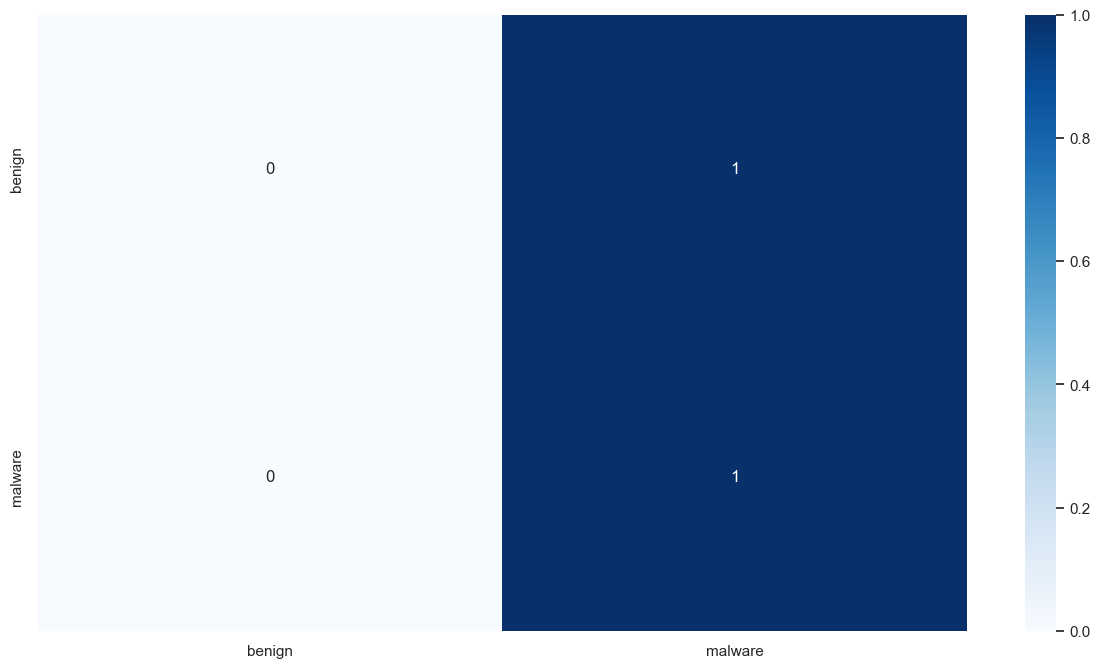

In [256]:
# We print our results
sns.set(rc={'figure.figsize':(15,8)})
predictions = clf.predict(X_test)
true_labels = y_test
cf_matrix = confusion_matrix(true_labels, predictions)
clf_report = classification_report(true_labels, predictions, digits=5)
heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', 
                      xticklabels=np.unique(true_labels), 
                      yticklabels=np.unique(true_labels)) 

# The heatmap is cool but this is the most important result
print(clf_report)

## plot feature importance

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.28072
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.31458
Feature: 7, Score: 0.04032
Feature: 8, Score: 0.06525
Feature: 9, Score: 0.06506
Feature: 10, Score: 0.23407
Feature: 11, Score: 0.00000


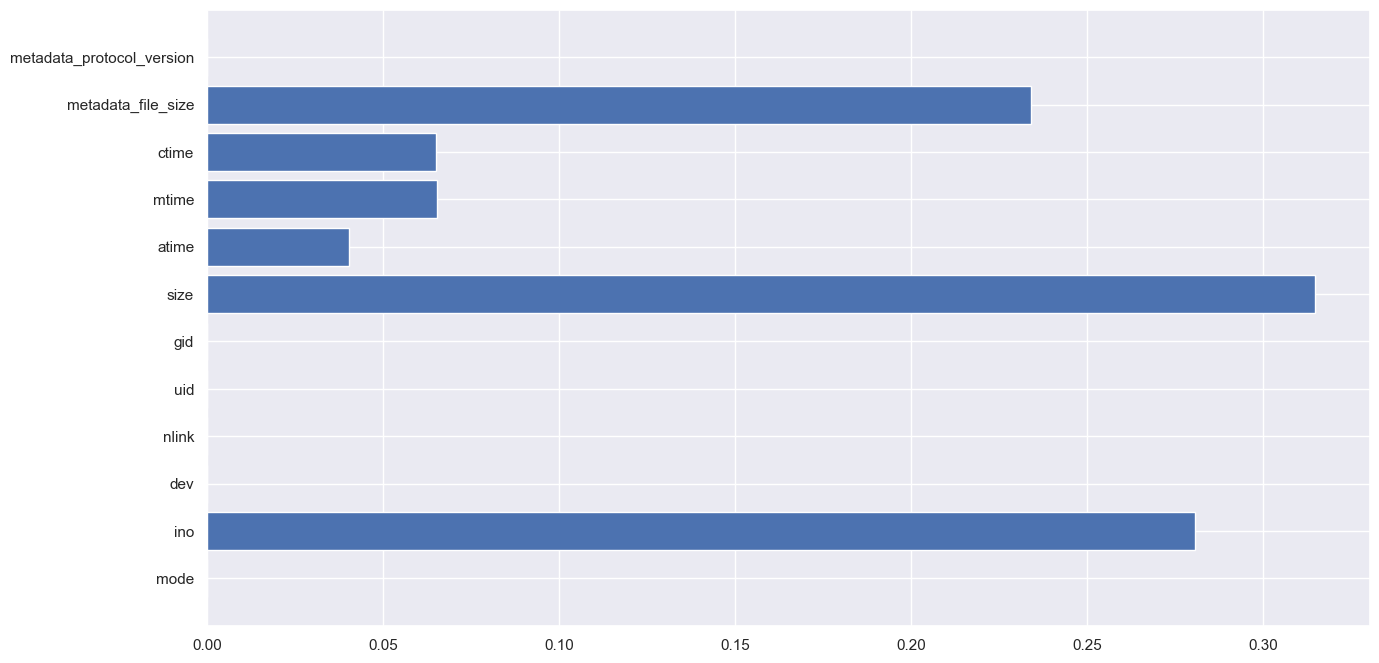

In [257]:
# https://machinelearningmastery.com/calculate-feature-importance-with-python/
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.yticks(np.arange(X_train.shape[1]), features_list)
pyplot.ylim([-1, X_train.shape[1]])
pyplot.barh(range(X_train.shape[1]), clf.feature_importances_, align="center")
pyplot.show()

## GradientBoostingClassifier()

[('benign', 3), ('malware', 6)]
              precision    recall  f1-score   support

      benign    0.00000   0.00000   0.00000         1
     malware    0.50000   1.00000   0.66667         1

    accuracy                        0.50000         2
   macro avg    0.25000   0.50000   0.33333         2
weighted avg    0.25000   0.50000   0.33333         2



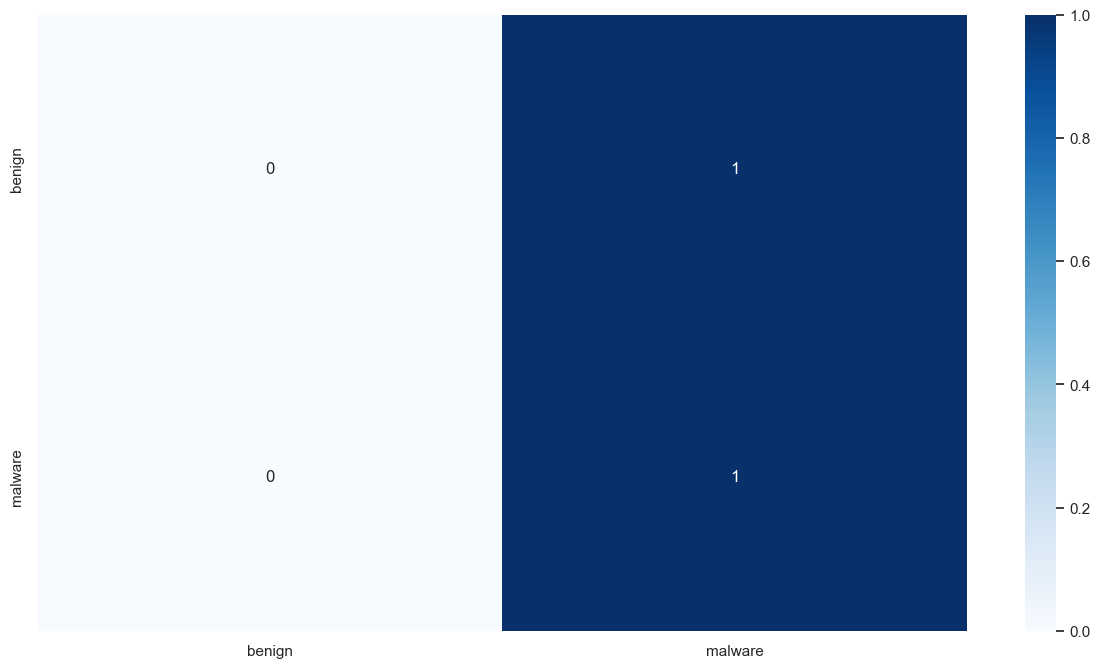

In [258]:
from sklearn.ensemble import GradientBoostingClassifier
Gradient_Boosting =  GradientBoostingClassifier(random_state=0)
# We choose our model of choice and set it's hyper parameters you can change anything
Gradient_Boosting.fit(X_train, y_train)

# Check data balance and variety
print(sorted(Counter(y_train).items()))
ResultPrintout(Gradient_Boosting)

# plot feature importance

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.09673
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.70388
Feature: 7, Score: 0.00594
Feature: 8, Score: 0.02499
Feature: 9, Score: 0.00084
Feature: 10, Score: 0.16761
Feature: 11, Score: 0.00000


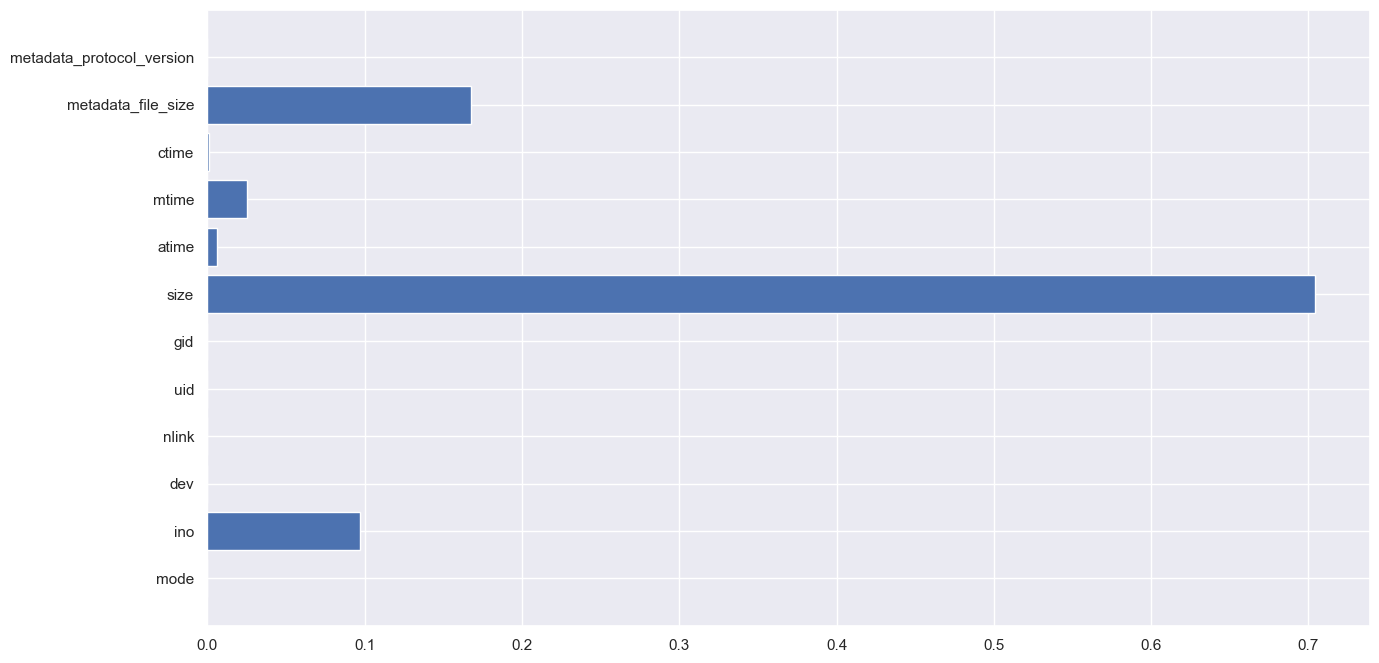

In [259]:
# https://machinelearningmastery.com/calculate-feature-importance-with-python/
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from matplotlib import pyplot

# get importance
importance = Gradient_Boosting.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.yticks(np.arange(X_train.shape[1]), features_list)
pyplot.ylim([-1, X_train.shape[1]])
pyplot.barh(range(X_train.shape[1]), Gradient_Boosting.feature_importances_, align="center")
pyplot.show()

## ExtraTreesClassifier()

[('benign', 3), ('malware', 6)]
              precision    recall  f1-score   support

      benign    0.00000   0.00000   0.00000         1
     malware    0.50000   1.00000   0.66667         1

    accuracy                        0.50000         2
   macro avg    0.25000   0.50000   0.33333         2
weighted avg    0.25000   0.50000   0.33333         2



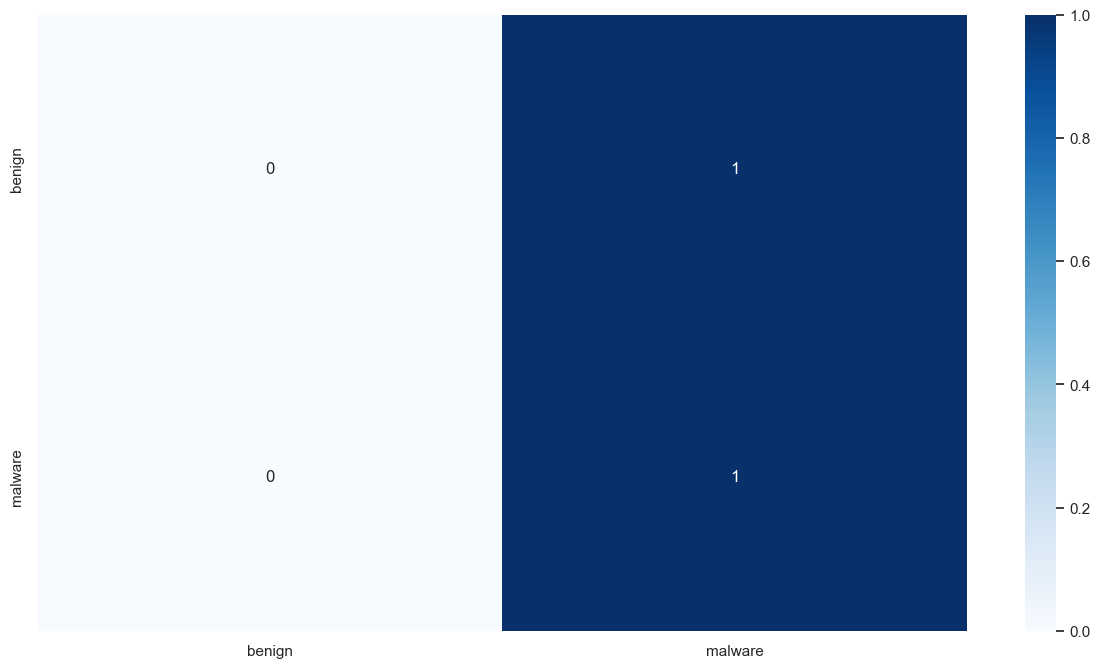

In [260]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
Extra_Trees=  ExtraTreesClassifier(random_state=42, class_weight='balanced')
# We choose our model of choice and set it's hyper parameters you can change anything
Extra_Trees.fit(X_train, y_train)

# Check data balance and variety
print(sorted(Counter(y_train).items()))
ResultPrintout(Extra_Trees)

# plot feature importance

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.27849
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.27513
Feature: 7, Score: 0.09051
Feature: 8, Score: 0.04564
Feature: 9, Score: 0.08570
Feature: 10, Score: 0.22454
Feature: 11, Score: 0.00000


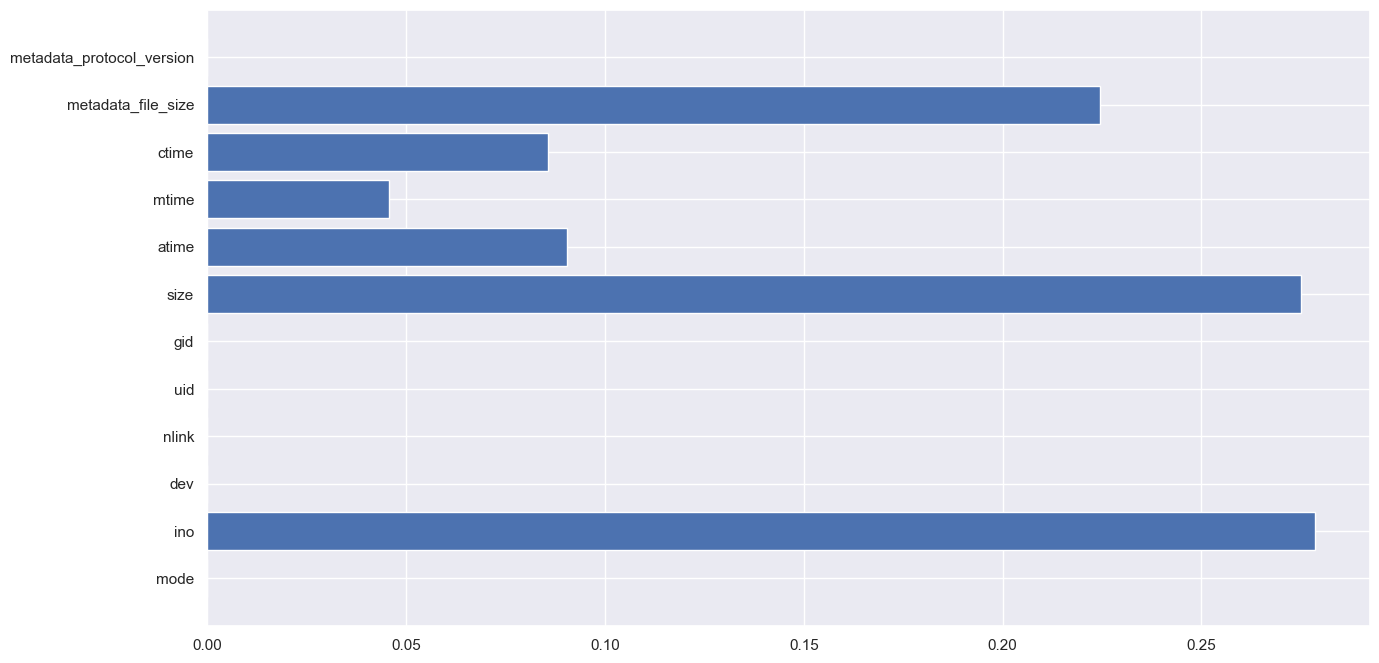

In [261]:
#from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot

# get importance
importance = Extra_Trees.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.yticks(np.arange(X_train.shape[1]), features_list)
pyplot.ylim([-1, X_train.shape[1]])
pyplot.barh(range(X_train.shape[1]), Extra_Trees.feature_importances_, align="center")
pyplot.show()

# Testing more algorithms

In [263]:
!pip3 install xgboost

     ---------------------------------------- 70.9/70.9 MB 4.4 MB/s eta 0:00:00


HistGradientBoostingClassifier(random_state=42)
              precision    recall  f1-score   support

      benign    0.00000   0.00000   0.00000         1
     malware    0.50000   1.00000   0.66667         1

    accuracy                        0.50000         2
   macro avg    0.25000   0.50000   0.33333         2
weighted avg    0.25000   0.50000   0.33333         2

SGDClassifier(class_weight='balanced', random_state=42)
              precision    recall  f1-score   support

      benign    0.00000   0.00000   0.00000         1
     malware    0.50000   1.00000   0.66667         1

    accuracy                        0.50000         2
   macro avg    0.25000   0.50000   0.33333         2
weighted avg    0.25000   0.50000   0.33333         2

ExtraTreesClassifier(class_weight='balanced', random_state=42)
              precision    recall  f1-score   support

      benign    0.00000   0.00000   0.00000         1
     malware    0.50000   1.00000   0.66667         1

    accuracy   

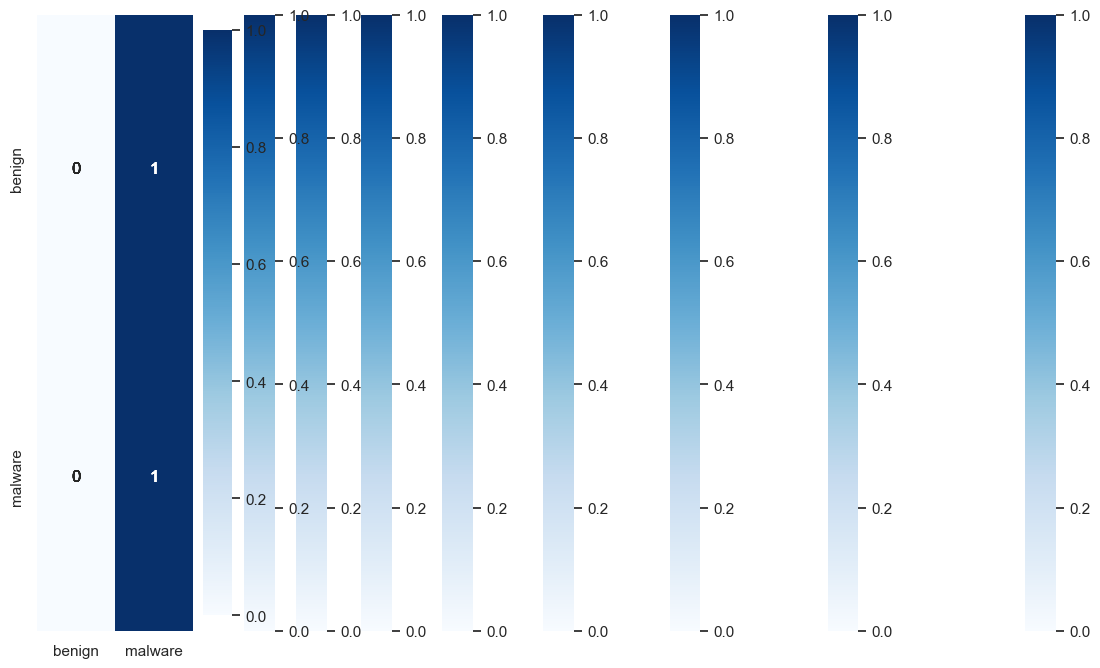

In [269]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from timeit import timeit
import xgboost 
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline


Logistic_Regression =  LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

Decision_Tree =DecisionTreeClassifier(random_state=42, class_weight='balanced')

Random_Forest =  RandomForestClassifier(random_state=42, class_weight='balanced')

Extra_Trees=  ExtraTreesClassifier(random_state=42, class_weight='balanced')

Gradient_Boosting =  GradientBoostingClassifier(random_state=42)

Hist_Gradient_Boosting =  HistGradientBoostingClassifier(random_state=42)

AdaBoost = AdaBoostClassifier(random_state=42)

SGD = SGDClassifier(random_state=42, class_weight='balanced')

SVC =SVC(class_weight='balanced', random_state=42)

# Nearest_Neighbor = KNeighborsClassifier(100)

# Perceptron = Perceptron(random_state=42)

models={Logistic_Regression,Decision_Tree,Random_Forest,Extra_Trees,Gradient_Boosting,Hist_Gradient_Boosting,AdaBoost,SGD,SVC}

for model in models:
    print(model)
    # Train Model
    model.fit(X_train, y_train)
    
    ResultPrintout(model)

## Choosing the best algorithm

In [270]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
from sklearn.metrics import accuracy_score
best_accuracy=0
best_model=None
# ,gbc
models={clf,Gradient_Boosting,Logistic_Regression,Decision_Tree,Random_Forest,Extra_Trees,Gradient_Boosting,Hist_Gradient_Boosting,AdaBoost,SGD,SVC}

for i in models:
    print(i)
    sns.set(rc={'figure.figsize':(15,8)})
    predictions = i.predict(X_test)
    true_labels = y_test
    print(accuracy_score(true_labels, predictions)*100)
    if accuracy_score(true_labels, predictions)*100 > best_accuracy:
        best_accuracy=accuracy_score(true_labels, predictions)*100
        best_model=i

        
print("------------------------------------------")
print(best_accuracy)
print(best_model)

HistGradientBoostingClassifier(random_state=42)
50.0
SGDClassifier(class_weight='balanced', random_state=42)
50.0
ExtraTreesClassifier(class_weight='balanced', random_state=42)
50.0
RandomForestClassifier(class_weight='balanced', random_state=42)
50.0
SVC(class_weight='balanced', random_state=42)
50.0
DecisionTreeClassifier(class_weight='balanced', random_state=42)
50.0
LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
50.0
GradientBoostingClassifier(random_state=42)
50.0
RandomForestClassifier(n_estimators=150)
50.0
AdaBoostClassifier(random_state=42)
50.0
------------------------------------------
50.0
HistGradientBoostingClassifier(random_state=42)


## Confusion matrix
In technical terms: A confusion matrix is a performance measurement technique for Machine learning classification. It is a kind of table which helps you to know the performance of the classification model on a set of test data for that the true values are known.

## Printing the best algorithm

[('benign', 3), ('malware', 6)]
              precision    recall  f1-score   support

      benign    0.00000   0.00000   0.00000         1
     malware    0.50000   1.00000   0.66667         1

    accuracy                        0.50000         2
   macro avg    0.25000   0.50000   0.33333         2
weighted avg    0.25000   0.50000   0.33333         2



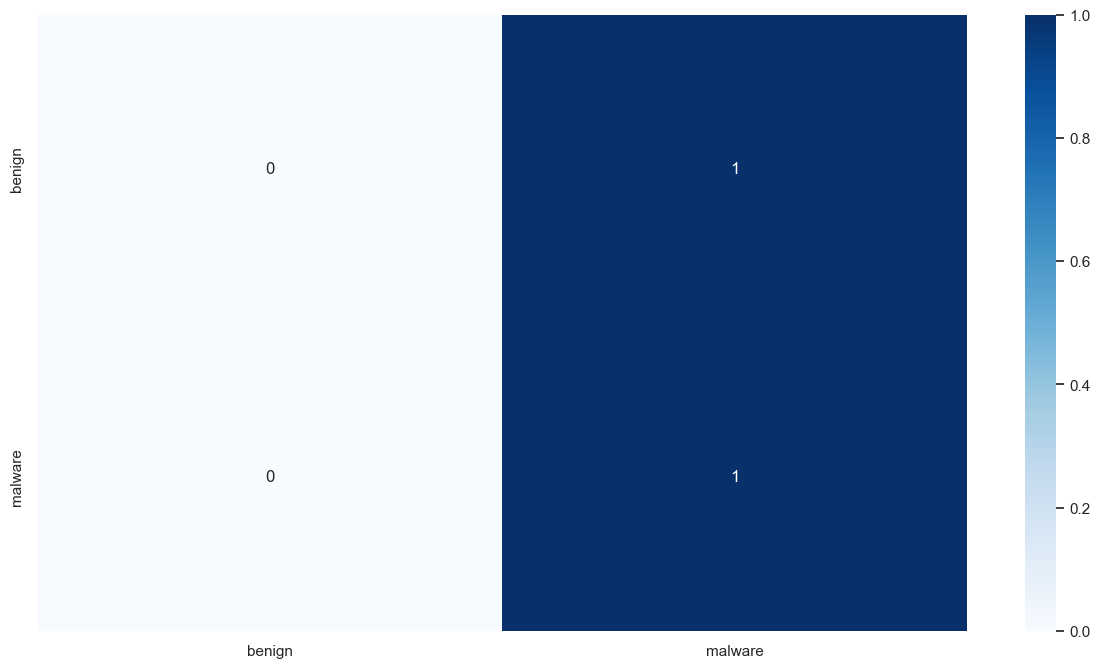

In [271]:
best_model.fit(X_train, y_train)

# Check data balance and variety
print(sorted(Counter(y_train).items()))
ResultPrintout(best_model)

## Accuracy:
    
Accuracy tells us how often is the classifier correct?

Accuracy = ( TP + TN ) / ( TP + TN + FP + FN )
True Positive (TP) : Observation is positive, and is predicted to be positive.

False Negative (FN) : Observation is positive, but is predicted negative.

True Negative (TN) : Observation is negative, and is predicted to be negative.

False Positive (FP) : Observation is negative, but is predicted positive.

i used sklearn - Accuracy which calculates this
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html https://medium.com/analytics-vidhya/classification-and-its-performance-metrics-in-machine-learning-f0ad57866ec9

## Recall

Recall gives us an idea about when it’s actually yes, how often does it predict yes. The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The best value is 1 and the worst value is 0.

i used sklearn - recall


In [272]:
predictions = best_model.predict(X_test)
true_labels = y_test
accuracy = accuracy_score(true_labels, predictions)
#The printing is according to the section Introduction to ML in python given to us
print("Accuracy score: {0:.2f}%".format(accuracy*100))
print(best_model)

Accuracy score: 50.00%
HistGradientBoostingClassifier(random_state=42)


In [273]:
from sklearn.metrics import recall_score
recall_average = recall_score(y_test, best_model.predict(X_test), average="binary", pos_label= 'malware')
print("Recall score (malware): {0:.2f}%".format(recall_average*100))
recall_average = recall_score(y_test, best_model.predict(X_test), average="binary",pos_label='benign')
print("Recall score (benign): {0:.2f}%".format(recall_average*100))

Recall score (malware): 100.00%
Recall score (benign): 0.00%


#### save the model 

In [274]:
# save the model 
import pickle
pickle.dump(best_model, open("model.pkl",'wb'))

#### Creating DataFrame to Export Pandas DataFrame to CSV

https://www.geeksforgeeks.org/saving-a-pandas-dataframe-as-a-csv/

In [280]:
# dictionary of list
dict = {'index': range(0,11), 'video_nal': info["mal"]}
df = pd.DataFrame(dict)
print(df)
df.to_csv('results.csv',index=False)

    index video_nal
0       0    benign
1       1   malware
2       2   malware
3       3   malware
4       4   malware
5       5   malware
6       6   malware
7       7    benign
8       8    benign
9       9   malware
10     10    benign
